In [16]:
# -*- coding: utf-8 -*-
import dataiku
import numpy as np
from dataiku import pandasutils as pdu
import pandas as pd
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

# Get paths to folder and spectral bands
images= dataiku.Folder("ErE6h3Lf")
path_to_folder = images.get_path()
path_to_images = images.list_paths_in_partition()

# Read all bands and store them in one 3D array
rows = 960
cols = 1280
bands = 4
all_bands = np.zeros([rows,cols,bands])
for i in range(0, bands):
    p = path_to_folder+path_to_images[i]
    all_bands[:,:,i] = plt.imread(p)

# Compute Vegetation Indices
I_GRE = all_bands[:,:,0]
I_RED = all_bands[:,:,1]
I_REG = all_bands[:,:,2]
I_NIR = all_bands[:,:,3]
np.seterr(divide='ignore', invalid='ignore')
NDVI = (I_NIR - I_RED)/(I_NIR + I_RED)
NDVI[np.isinf(NDVI)] = np.nan
NDVI_REG = (I_NIR - I_REG)/(I_NIR + I_REG)
NDVI_REG[np.isinf(NDVI_REG)] = np.nan
MSR = ((I_NIR /I_RED)-1)/(((I_NIR/I_RED)+1)**(1/2))
MSR[np.isinf(MSR)] = np.nan
MSR_REG = ((I_NIR /I_REG)-1)/(((I_NIR/I_REG)+1)**(1/2))
MSR_REG[np.isinf(MSR_REG)] = np.nan
CI_GRE = (I_NIR/I_GRE)-1
CI_GRE[np.isinf(CI_GRE)] = np.nan
CI_REG = (I_NIR/I_REG)-1
CI_REG[np.isinf(CI_REG)] = np.nan

# Decimate Images to Reduce Number of Pixels
w_size = 10
indx1 = np.array(range(0,w_size))
indx2 = indx1
I_GRE_decim = np.zeros([rows/w_size,cols/w_size])
I_RED_decim = np.zeros([rows/w_size,cols/w_size])
I_REG_decim = np.zeros([rows/w_size,cols/w_size])
I_NIR_decim = np.zeros([rows/w_size,cols/w_size])
NDVI_decim = np.zeros([rows/w_size,cols/w_size])
NDVI_REG_decim = np.zeros([rows/w_size,cols/w_size])
MSR_decim = np.zeros([rows/w_size,cols/w_size])
MSR_REG_decim = np.zeros([rows/w_size,cols/w_size])
CI_GRE_decim = np.zeros([rows/w_size,cols/w_size])
CI_REG_decim = np.zeros([rows/w_size,cols/w_size])
for i in range(0,rows/w_size):
    if i>0:
        indx1 = indx1+10
        indx2 = np.array(range(0,w_size))
    for j in range(0,cols/w_size):
        I_GRE_decim[i,j] = np.mean(I_GRE[indx1,indx2])
        I_RED_decim[i,j] = np.mean(I_RED[indx1,indx2])
        I_REG_decim[i,j] = np.mean(I_REG[indx1,indx2])
        I_NIR_decim[i,j] = np.mean(I_NIR[indx1,indx2])
        NDVI_decim[i,j] = np.mean(NDVI[indx1,indx2])
        NDVI_REG_decim[i,j] = np.mean(NDVI_REG[indx1,indx2])
        MSR_decim[i,j] = np.mean(MSR[indx1,indx2])
        MSR_REG_decim[i,j] = np.mean(MSR_REG[indx1,indx2])
        CI_GRE_decim[i,j] = np.mean(CI_GRE[indx1,indx2])
        CI_REG_decim[i,j] = np.mean(CI_REG[indx1,indx2])
        indx2 = indx2 + w_size 
        
# Export features to CSV file
r_size = I_GRE_decim.shape[0]*I_GRE_decim.shape[1]
I_GRE_reshaped = I_GRE_decim.reshape(r_size)
I_RED_reshaped = I_RED_decim.reshape(r_size)
I_REG_reshaped = I_REG_decim.reshape(r_size)
I_NIR_reshaped = I_NIR_decim.reshape(r_size)
NDVI_reshaped = NDVI_decim.reshape(r_size)
NDVI_REG_reshaped  = NDVI_REG_decim.reshape(r_size)
MSR_reshaped = MSR_decim.reshape(r_size)
MSR_REG_reshaped = MSR_REG_decim.reshape(r_size)
CI_GRE_reshaped = CI_GRE_decim.reshape(r_size)
CI_REG_reshaped = CI_REG_decim.reshape(r_size)
output_data = np.array([I_GRE_reshaped,I_RED_reshaped,I_REG_reshaped,I_NIR_reshaped,NDVI_reshaped,NDVI_REG_reshaped,MSR_reshaped,MSR_REG_reshaped,CI_GRE_reshaped,CI_REG_reshaped])
output_data = np.transpose(output_data) # Rows = Pixels; Columns = Features

spectral_Features_df = pd.DataFrame(output_data) # Compute a Pandas dataframe to write into Spectral_Features

# Write recipe outputs
spectral_Features = dataiku.Dataset("Spectral_Features")
spectral_Features.write_with_schema(spectral_Features_df)

12288 rows successfully written (7CpQTzzPDf)


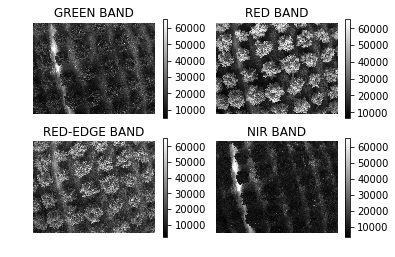

In [51]:
import matplotlib.pyplot as plt
# Display Feature Images
plt.subplot(2,2,1), plt.imshow(I_GRE,cmap='gray'),plt.colorbar(),plt.title('GREEN BAND'),plt.axis('off')
plt.subplot(2,2,2), plt.imshow(I_RED,cmap='gray'),plt.colorbar(),plt.title('RED BAND'),plt.axis('off')
plt.subplot(2,2,3), plt.imshow(I_REG,cmap='gray'),plt.colorbar(),plt.title('RED-EDGE BAND'),plt.axis('off')
plt.subplot(2,2,4), plt.imshow(I_NIR,cmap='gray'),plt.colorbar(),plt.title('NIR BAND'),plt.axis('off')

plt.show()
%matplotlib inline

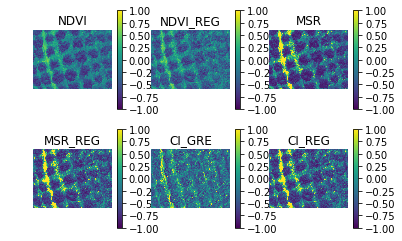

In [54]:
plt.subplot(2,3,1), plt.imshow(NDVI,vmin = -1, vmax = 1),plt.colorbar(), plt.title('NDVI'),plt.axis('off')
plt.subplot(2,3,2), plt.imshow(NDVI_REG,vmin = -1, vmax = 1),plt.colorbar(),plt.title('NDVI_REG'),plt.axis('off')
plt.subplot(2,3,3), plt.imshow(MSR,vmin = -1, vmax = 1),plt.colorbar(),plt.title('MSR'),plt.axis('off')
plt.subplot(2,3,4), plt.imshow(MSR_REG,vmin = -1, vmax = 1),plt.colorbar(),plt.title('MSR_REG'),plt.axis('off')
plt.subplot(2,3,5), plt.imshow(CI_GRE,vmin = -1, vmax = 1),plt.colorbar(), plt.title('CI_GRE'),plt.axis('off')
plt.subplot(2,3,6), plt.imshow(CI_REG,vmin = -1, vmax = 1),plt.colorbar(),plt.title('CI_REG'),plt.axis('off')
plt.show()
%matplotlib inline